# Linear Regression in Python
#### This is a practice of what's on https://www.youtube.com/watch?v=u1cc1r_Y7M0
#### & https://www.youtube.com/watch?v=hokALdIst8k
#### Data is from https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set
#### & https://archive.ics.uci.edu/ml/machine-learning-databases/00551/
#### (gt_2015.csv)

In [1]:
# Read data
import pandas as pd
import numpy as np

GTdata = pd.read_csv('gt_2015.csv', header=0)
# Cursory check
GTdata

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.953200,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.219100,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.949150,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.007500,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.285800,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
5,1.831900,1021.7,76.411,2.8410,23.495,1076.4,549.92,133.58,11.829,2.0812,81.193
6,2.074000,1022.0,75.974,2.7981,22.945,1073.7,549.98,131.53,11.687,2.2529,83.171
7,1.782400,1022.6,73.535,2.8327,23.337,1075.7,550.01,133.18,11.745,3.7350,85.749
8,1.593000,1023.2,72.873,2.8729,23.654,1078.5,550.06,135.38,11.772,3.6398,86.491
9,1.681900,1023.8,72.441,2.9058,23.463,1077.9,550.12,134.86,11.742,3.5866,86.328


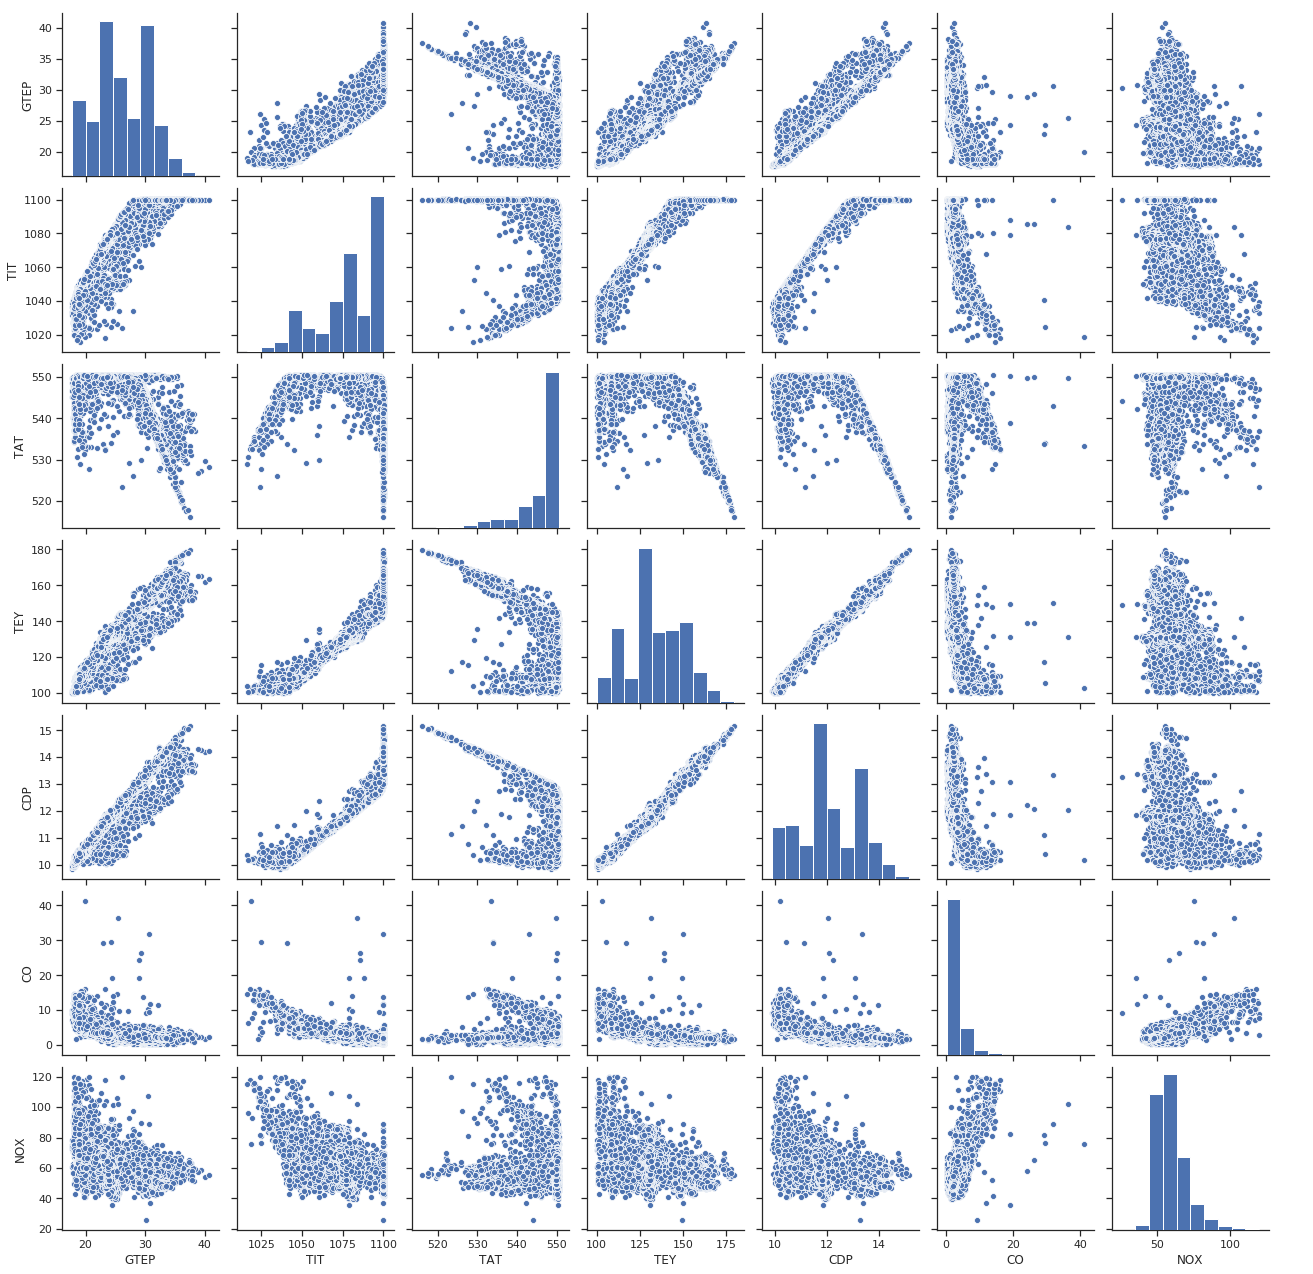

In [10]:
# Matrix plot
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# get a few columns of BCdata.
GTdata_small = GTdata.iloc[:,4:11]
g = sns.pairplot(GTdata_small)

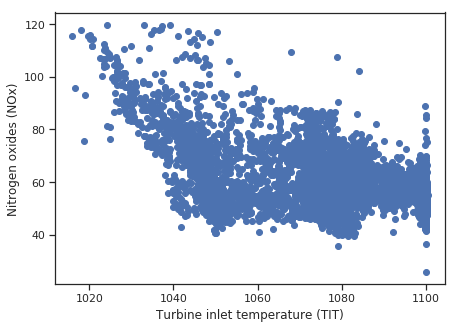

In [3]:
# Plot 'Nitrogen oxides (NOx)'(y) vs 'Turbine inlet temperature (TIT)'(x)
import matplotlib.pyplot as plt

x=GTdata['TIT']
y=GTdata['NOX']

fig = plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.xlabel('Turbine inlet temperature (TIT)')
plt.ylabel('Nitrogen oxides (NOx)')
plt.show()

In [4]:
# Build a linear model to predict NOX (y) using TIT (x).
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Get x and y ready from BCdata
y = GTdata[['NOX']]
x = GTdata[['TIT']]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the data
regr.fit(x, y)

# Make predictions using the testing set. Here same x is used for training and predict. This is to draw a line and for the metric calculations.
y_pred = regr.predict(x)


# The coefficients
print('Coefficients (same as slope coefficient in R): ', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R^2:                %.2f'% r2_score(y, y_pred))

Coefficients (same as slope coefficient in R):  [[-0.29296878]]
Mean squared error: 90.40
R^2:                0.27


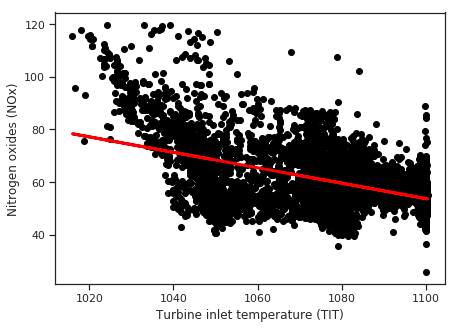

In [5]:
# Adding the fitted line to the data plot.
fig = plt.figure(figsize=(7,5))

plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='red', linewidth=3)

plt.xlabel('Turbine inlet temperature (TIT)')
plt.ylabel('Nitrogen oxides (NOx)')

plt.show()

In [6]:
# Predict y using a new x.
new_data = pd.DataFrame(data=[1045], columns=['TIT'])
new_data
regr.predict(new_data)

array([[69.84403258]])

# Multiple Regression in R
#### Unlike the above case, use multiple inputs (x features) to predict a single output (y values).

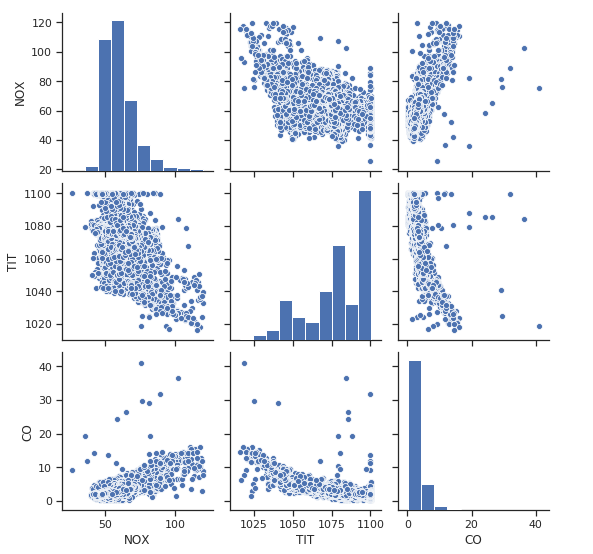

In [7]:
# Matrix plot
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# get a few columns of BCdata.
GTMdata = GTdata[['NOX','TIT','CO']]
g = sns.pairplot(GTMdata)

In [8]:
# Build a linear model to predict NOX (y) using TIT (x1) and CO (x2).
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Get x and y ready from BCdata
y = GTMdata[['NOX']]
x = GTMdata[['TIT','CO']]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the data
regr.fit(x, y)

# Make predictions using the testing set. Here same x is used for training and predict. This is for the metric calculations.
y_pred = regr.predict(x)


# The coefficients
print('Coefficients (same as slope coefficient in R): ', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R^2:                %.2f'% r2_score(y, y_pred))

Coefficients (same as slope coefficient in R):  [[-0.02396136  3.22273161]]
Mean squared error: 66.78
R^2:                0.46


In [9]:
# Predict y using a new x.
new_data = pd.DataFrame(data=[[1045,25]], columns=['TIT','CO'])
new_data
regr.predict(new_data)

array([[131.1857761]])